In [1]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime

In [3]:
data = pckl.load(open('ARK_data.pckl','rb'))

In [4]:
data.head()

,review,upvoted,comment_upvotes,comment_funny_votes,early_review,time_of_review,minutes_played,playtime_2weeks,last_played,games_owned,author_reviews,purchased,free,upvotes,total_votes,percent_upvotes
107105,"Its really good, only down side is you cant fo...",True,100,203,True,2015-06-02 22:29:25,4578,0,2016-11-30 23:31:47,760,4,False,False,0,1,0.0
107104,This game manages to make you feel all sorts o...,True,744,44,True,2015-06-02 22:30:07,28946,0,2016-07-02 22:22:02,370,9,False,False,0,2,0.0
107103,LOVE THIS !!!!,True,74,13,True,2015-06-02 22:31:01,82165,0,2018-12-16 00:37:03,134,1,False,False,0,3,0.0
107102,At the point of this recommendation being made...,True,58,17,True,2015-06-02 22:35:36,664,0,2017-06-16 02:07:50,396,11,False,False,0,4,0.0
107101,"""Since *that game we all know of"" vanished the...",True,346,20,True,2015-06-02 22:36:41,43151,0,2016-06-17 09:25:14,634,82,False,False,0,5,0.0


In [5]:
len(data)

107106

In [6]:
features_dict = {'review': 'review',
                'voted_up': 'upvoted',
                'votes_up': 'comment_upvotes',
                'votes_funny': 'comment_funny_votes',
                'written_during_early_access': 'early_review',
                'timestamp_updated': 'time_of_review',
                'author.playtime_forever': 'minutes_played',
                'author.playtime_last_two_weeks': 'playtime_2weeks',
                'author.last_played': 'last_played',
                'author.num_games_owned': 'games_owned',
                'author.num_reviews': 'author_reviews',
                'steam_purchase': 'purchased',
                'received_for_free': 'free'}

features = list(features_dict.values())

In [8]:
df = data.rename(index=str, columns=features_dict)
df = df[features]

In [39]:
sorted_df['percent_upvotes'] = list(reversed(sorted_df['percent_upvotes']))

In [10]:
df['last_played'] = pd.to_datetime(df['last_played'], unit='s')
df['time_of_review'] = pd.to_datetime(df['time_of_review'], unit='s')

In [11]:
total_upvotes = 0
upvotes = []
total_votes = list(range(1,len(df)+1))

for i in range(len(df)):
    if df.iloc[i].upvoted == True:
        total_upvotes += 1
        upvotes.append(total_upvotes)
    else:
        upvotes.append(total_upvotes)
        

In [26]:
sorted_df = df.sort_values(by='time_of_review',ascending=True)

df['upvotes'] = upvotes
df['total_votes'] = total_votes
df['percent_upvotes'] = df['upvotes']/df['total_votes']

In [44]:
sorted_df['percent_upvotes'] = sorted_df['upvotes']/sorted_df['total_votes']
sorted_df.head()

,review,upvoted,comment_upvotes,comment_funny_votes,early_review,time_of_review,minutes_played,playtime_2weeks,last_played,games_owned,author_reviews,purchased,free,upvotes,total_votes,percent_upvotes
107105,"Its really good, only down side is you cant fo...",True,100,203,True,2015-06-02 22:29:25,4578,0,2016-11-30 23:31:47,760,4,False,False,1,1,1.0
107104,This game manages to make you feel all sorts o...,True,744,44,True,2015-06-02 22:30:07,28946,0,2016-07-02 22:22:02,370,9,False,False,2,2,1.0
107103,LOVE THIS !!!!,True,74,13,True,2015-06-02 22:31:01,82165,0,2018-12-16 00:37:03,134,1,False,False,3,3,1.0
107102,At the point of this recommendation being made...,True,58,17,True,2015-06-02 22:35:36,664,0,2017-06-16 02:07:50,396,11,False,False,4,4,1.0
107101,"""Since *that game we all know of"" vanished the...",True,346,20,True,2015-06-02 22:36:41,43151,0,2016-06-17 09:25:14,634,82,False,False,5,5,1.0


In [45]:
sorted_df['percent_upvotes']

107105    1.000000
107104    1.000000
107103    1.000000
107102    1.000000
107101    1.000000
107100    1.000000
107099    1.000000
107098    0.875000
107097    0.888889
107096    0.800000
107095    0.727273
107094    0.666667
107093    0.692308
107092    0.714286
107091    0.733333
107090    0.750000
107089    0.764706
107088    0.777778
107087    0.789474
107086    0.800000
107085    0.809524
107084    0.818182
107083    0.826087
107082    0.791667
107081    0.800000
107080    0.769231
107079    0.777778
107078    0.785714
107077    0.793103
107076    0.766667
            ...   
29        0.639745
28        0.639739
27        0.639743
26        0.639746
25        0.639749
24        0.639753
23        0.639747
22        0.639750
21        0.639753
20        0.639747
19        0.639751
18        0.639754
17        0.639758
16        0.639761
15        0.639755
14        0.639758
13        0.639762
12        0.639756
11        0.639750
10        0.639744
9         0.639747
8         0.

In [62]:

#pckl.dump(sorted_df,open('ARK_sorted_data.pckl','wb'))

In [19]:
%matplotlib inline

In [20]:
import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

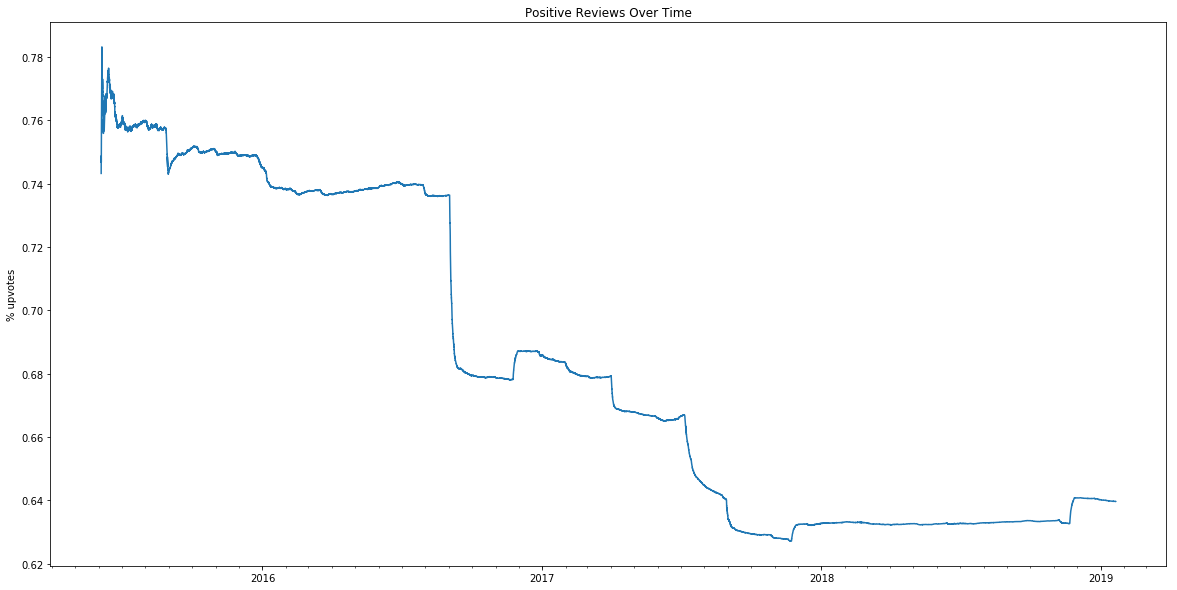

In [60]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

date = sorted_df['time_of_review'].iloc[1000:]
percent = sorted_df['percent_upvotes'].iloc[1000:]

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(date, percent)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('% upvotes')
plt.title('Positive Reviews Over Time')

plt.show()

In [61]:
fig.savefig('ARK_percent_upvotes_over_time.png')

In [64]:
import numpy as np

In [65]:
data['y_p'] = np.diff(sorted_df['percent_upvotes']) / np.diff(sorted_df['time_of_review'])
data['x_p'] = (np.array(sorted_df['time_of_review'])[:-1] + np.array(sorted_df['time_of_review'])[1:]) / 2

TypeError: ufunc true_divide cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [ ]:
sorted_df.head()

In [68]:
data_check = pckl.load(open('ARK.pckl','rb'))

In [69]:
data_check.head()

,author.last_played,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.steamid,comment_count,language,received_for_free,recommendationid,review,steam_purchase,timestamp_created,timestamp_updated,voted_up,votes_funny,votes_up,weighted_vote_score,written_during_early_access
0,1548014842,6,1,412,412,76561198846762449,0,english,False,48448687,Cool but it completly ruined my Graphics Card...,True,1548014192,1548014192,False,1,0,0,False
1,1548017764,238,35,2235,2235,76561198008955625,0,english,False,48430381,"After 30 hours of gameplay, this is how it was...",False,1547938970,1548013264,False,0,1,0.523809552192687988,False
2,1545131771,171,3,5473,0,76561197991488912,0,english,False,48447847,Made by the scummiest gaming company ever.,False,1548011162,1548011162,False,0,2,0.52173912525177002,False
3,1504742084,377,6,101,0,76561198013957136,0,english,False,48447210,"""Disk space required: 101093 mb"" oh my lord",False,1548008968,1548008968,False,1,0,0,False
4,1548017463,11,1,575,575,76561197993720855,0,english,False,48446867,So i have spent over 24 hours trying to log in...,True,1548007836,1548007836,False,0,1,0.523809552192687988,False


In [1]:
topics

NameError: name 'topics' is not defined